In [ ]:
import pandas as pd

metrics = pd.read_parquet(
    "/home/martin/oar-deployments/2025-06-20-bench2/154640-batch1", engine="pyarrow"
)


,swhfuse_waiting_graph,swhfuse_get_blob,swhfuse_waiting_storage,swhfuse_not_found,swhfuse_waiting_objstorage
1750445557,69791.771038,1207.0,48.429536,982.0,313.266043
1750445558,52831.504877,2902.0,89.463288,2501.0,471.381729
1750445559,29728.746682,1068.0,28.577353,880.0,202.628320
1750445560,31518.231604,402.0,12.322210,331.0,76.990932
1750445561,30990.194806,313.0,11.467358,269.0,50.357242
...,...,...,...,...,...
1750448091,NaN,222.0,1.781031,222.0,NaN
1750448092,NaN,223.0,1.711135,223.0,NaN
1750448093,NaN,222.0,1.804055,222.0,NaN
1750448094,NaN,222.0,1.761832,222.0,NaN


In [11]:
xp_length = max(metrics.index)-min(metrics.index)
xp_length

3677

In [12]:
for c in metrics.columns:
    print(f"total {c}: " + str(metrics[c].sum()))
for c in metrics.columns:
    print(f"average per process {c}: " + str(metrics[c].sum() / 2000))

accessed = metrics["swhfuse_get_blob"].sum() - metrics["swhfuse_not_found"].sum()
print(f"Actually accessed files = {accessed}, ie. {accessed / xp_length}/s")

total swhfuse_waiting_graph: 74033710.15844801
total swhfuse_get_blob: 47985487.0
total swhfuse_waiting_storage: 1159819.611606
total swhfuse_not_found: 36082837.0
total swhfuse_waiting_objstorage: 10313844.484252
average per process swhfuse_waiting_graph: 37016.855079224006
average per process swhfuse_get_blob: 23992.7435
average per process swhfuse_waiting_storage: 579.909805803
average per process swhfuse_not_found: 18041.4185
average per process swhfuse_waiting_objstorage: 5156.922242126
Actually accessed files = 11902650.0, ie. 3237.0546641283654/s


In [3]:
metrics["swhfuse_not_found"].sum() / metrics["swhfuse_get_blob"].sum()


np.float64(0.7519531269944181)

<Axes: title={'center': 'swh-fuse cumulated waiting times over 2000 processes'}, xlabel='xp time (s)', ylabel='waiting time (s)'>

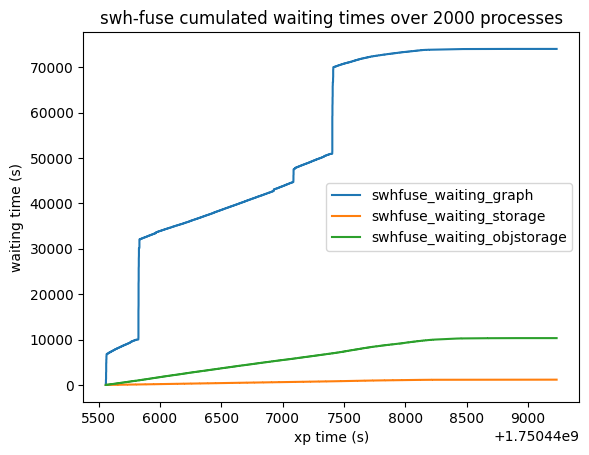

In [9]:
(
    metrics[
        [
            "swhfuse_waiting_graph",
            "swhfuse_waiting_storage",
            "swhfuse_waiting_objstorage",
        ]
    ]
    .sort_index()
    .fillna(0.0)
    .cumsum()
    / 1000
).plot(
    title="swh-fuse cumulated waiting times over 2000 processes",
    xlabel="xp time (s)",
    ylabel="waiting time (s)",
)


<Axes: title={'center': 'Number of object access/s'}>

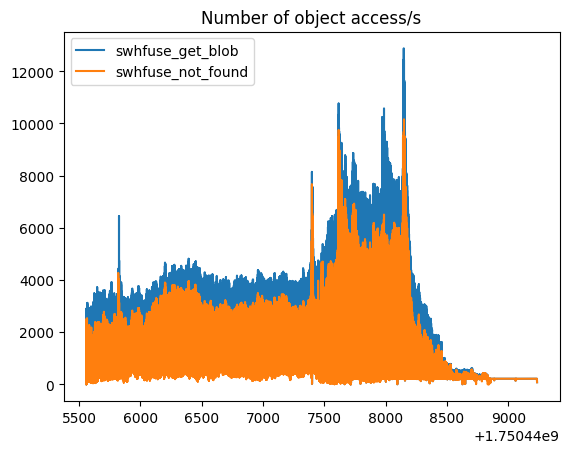

In [13]:
metrics[["swhfuse_get_blob", "swhfuse_not_found"]].sort_index().fillna(0.0).plot(
    title="Number of object access/s"
)
